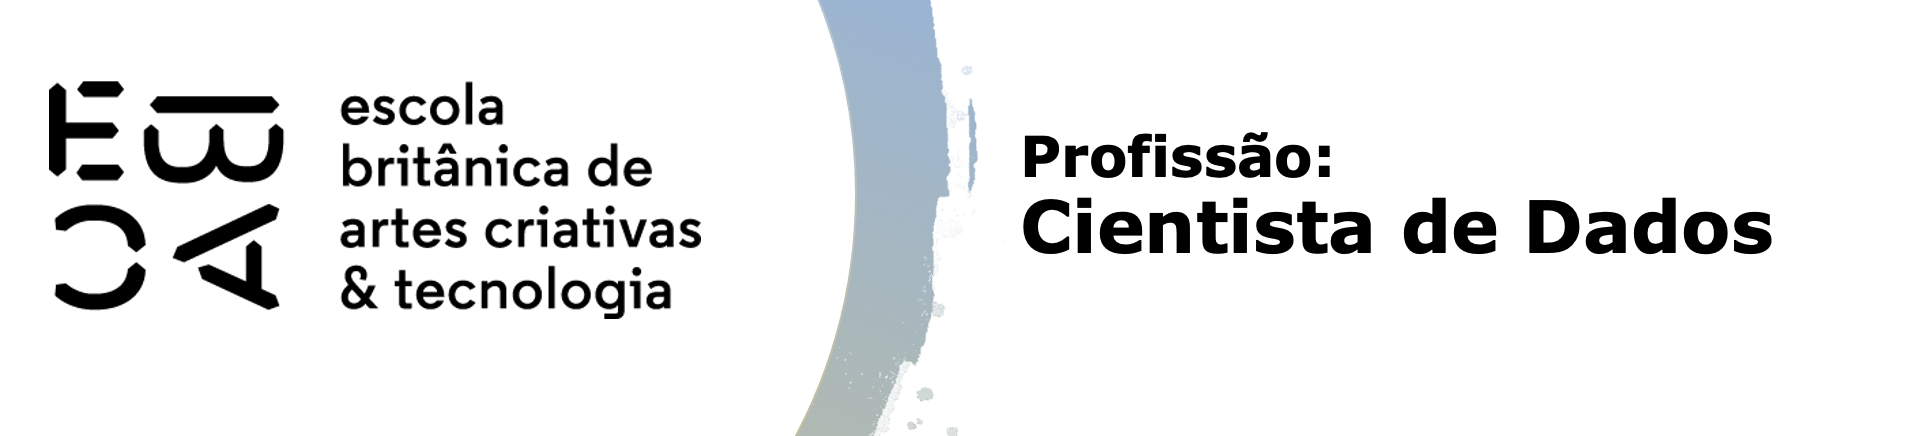

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from matplotlib.ticker import ScalarFormatter

In [16]:
x_treino = pd.read_csv('./x_treino.csv').drop(columns='Unnamed: 0')
x_teste  = pd.read_csv('./x_teste.csv').drop(columns='Unnamed: 0')

y_treino = pd.read_csv('./y_treino.csv').drop(columns='Unnamed: 0')
y_teste  = pd.read_csv('./y_teste.csv').drop(columns='Unnamed: 0')

# Ajusto os indices
x_treino.set_index([x_treino.index, 'subject'], inplace=True)
x_teste.set_index([x_teste.index, 'subject'], inplace=True)

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamos acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

**Reduzo os dataframes para as 3 variáveis identificadas no exercício anterior** 

In [20]:
colunas = ['angle(Y,gravityMean)', 'fBodyAccJerk-bandsEnergy()-1,16', 'tGravityAcc-min()-X']

X_treino = x_treino[colunas].copy()
X_teste  = x_teste[colunas].copy()

**Crio o modelo inicial e pego a lista de ccps**

In [28]:
modelo = DecisionTreeClassifier(min_samples_leaf=20)

lista_ccps = modelo.cost_complexity_pruning_path(X_treino, y_treino).ccp_alphas

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [32]:
%%time

# Argumentos da função:

# 1- Modelo
clf = DecisionTreeClassifier()

# 2- Dicionário com os ccps
grid_parametros = {'ccp_alpha': lista_ccps}


grid = GridSearchCV(estimator = clf, 
                    param_grid = grid_parametros, 
                    cv = 10, 
                    verbose = 100)

grid.fit(X_treino, y_treino)

Fitting 10 folds for each of 148 candidates, totalling 1480 fits
[CV 1/10; 1/148] START ccp_alpha=0.0............................................
[CV 1/10; 1/148] END .............ccp_alpha=0.0;, score=0.702 total time=   0.0s
[CV 2/10; 1/148] START ccp_alpha=0.0............................................
[CV 2/10; 1/148] END .............ccp_alpha=0.0;, score=0.650 total time=   0.0s
[CV 3/10; 1/148] START ccp_alpha=0.0............................................
[CV 3/10; 1/148] END .............ccp_alpha=0.0;, score=0.693 total time=   0.0s
[CV 4/10; 1/148] START ccp_alpha=0.0............................................
[CV 4/10; 1/148] END .............ccp_alpha=0.0;, score=0.578 total time=   0.0s
[CV 5/10; 1/148] START ccp_alpha=0.0............................................
[CV 5/10; 1/148] END .............ccp_alpha=0.0;, score=0.675 total time=   0.0s
[CV 6/10; 1/148] START ccp_alpha=0.0............................................
[CV 6/10; 1/148] END .............ccp_alpha=

[CV 5/10; 6/148] END ccp_alpha=7.935428286401337e-06;, score=0.664 total time=   0.0s
[CV 6/10; 6/148] START ccp_alpha=7.935428286401337e-06..........................
[CV 6/10; 6/148] END ccp_alpha=7.935428286401337e-06;, score=0.611 total time=   0.0s
[CV 7/10; 6/148] START ccp_alpha=7.935428286401337e-06..........................
[CV 7/10; 6/148] END ccp_alpha=7.935428286401337e-06;, score=0.727 total time=   0.0s
[CV 8/10; 6/148] START ccp_alpha=7.935428286401337e-06..........................
[CV 8/10; 6/148] END ccp_alpha=7.935428286401337e-06;, score=0.680 total time=   0.0s
[CV 9/10; 6/148] START ccp_alpha=7.935428286401337e-06..........................
[CV 9/10; 6/148] END ccp_alpha=7.935428286401337e-06;, score=0.727 total time=   0.0s
[CV 10/10; 6/148] START ccp_alpha=7.935428286401337e-06.........................
[CV 10/10; 6/148] END ccp_alpha=7.935428286401337e-06;, score=0.722 total time=   0.0s
[CV 1/10; 7/148] START ccp_alpha=8.47016065071344e-06.........................

[CV 9/10; 11/148] END ccp_alpha=1.1276345561930963e-05;, score=0.728 total time=   0.0s
[CV 10/10; 11/148] START ccp_alpha=1.1276345561930963e-05.......................
[CV 10/10; 11/148] END ccp_alpha=1.1276345561930963e-05;, score=0.731 total time=   0.0s
[CV 1/10; 12/148] START ccp_alpha=1.3117748799968852e-05........................
[CV 1/10; 12/148] END ccp_alpha=1.3117748799968852e-05;, score=0.708 total time=   0.0s
[CV 2/10; 12/148] START ccp_alpha=1.3117748799968852e-05........................
[CV 2/10; 12/148] END ccp_alpha=1.3117748799968852e-05;, score=0.671 total time=   0.0s
[CV 3/10; 12/148] START ccp_alpha=1.3117748799968852e-05........................
[CV 3/10; 12/148] END ccp_alpha=1.3117748799968852e-05;, score=0.691 total time=   0.0s
[CV 4/10; 12/148] START ccp_alpha=1.3117748799968852e-05........................
[CV 4/10; 12/148] END ccp_alpha=1.3117748799968852e-05;, score=0.576 total time=   0.0s
[CV 5/10; 12/148] START ccp_alpha=1.3117748799968852e-05..........

[CV 10/10; 16/148] END ccp_alpha=1.889526207979179e-05;, score=0.699 total time=   0.2s
[CV 1/10; 17/148] START ccp_alpha=2.0571284477638755e-05........................
[CV 1/10; 17/148] END ccp_alpha=2.0571284477638755e-05;, score=0.713 total time=   0.0s
[CV 2/10; 17/148] START ccp_alpha=2.0571284477638755e-05........................
[CV 2/10; 17/148] END ccp_alpha=2.0571284477638755e-05;, score=0.664 total time=   0.0s
[CV 3/10; 17/148] START ccp_alpha=2.0571284477638755e-05........................
[CV 3/10; 17/148] END ccp_alpha=2.0571284477638755e-05;, score=0.684 total time=   0.0s
[CV 4/10; 17/148] START ccp_alpha=2.0571284477638755e-05........................
[CV 4/10; 17/148] END ccp_alpha=2.0571284477638755e-05;, score=0.578 total time=   0.0s
[CV 5/10; 17/148] START ccp_alpha=2.0571284477638755e-05........................
[CV 5/10; 17/148] END ccp_alpha=2.0571284477638755e-05;, score=0.678 total time=   0.0s
[CV 6/10; 17/148] START ccp_alpha=2.0571284477638755e-05...........

[CV 4/10; 22/148] END ccp_alpha=2.720718269623207e-05;, score=0.582 total time=   0.0s
[CV 5/10; 22/148] START ccp_alpha=2.720718269623207e-05.........................
[CV 5/10; 22/148] END ccp_alpha=2.720718269623207e-05;, score=0.673 total time=   0.0s
[CV 6/10; 22/148] START ccp_alpha=2.720718269623207e-05.........................
[CV 6/10; 22/148] END ccp_alpha=2.720718269623207e-05;, score=0.641 total time=   0.0s
[CV 7/10; 22/148] START ccp_alpha=2.720718269623207e-05.........................
[CV 7/10; 22/148] END ccp_alpha=2.720718269623207e-05;, score=0.712 total time=   0.0s
[CV 8/10; 22/148] START ccp_alpha=2.720718269623207e-05.........................
[CV 8/10; 22/148] END ccp_alpha=2.720718269623207e-05;, score=0.679 total time=   0.0s
[CV 9/10; 22/148] START ccp_alpha=2.720718269623207e-05.........................
[CV 9/10; 22/148] END ccp_alpha=2.720718269623207e-05;, score=0.724 total time=   0.0s
[CV 10/10; 22/148] START ccp_alpha=2.720718269623207e-05.................

[CV 8/10; 27/148] END ccp_alpha=3.0776012972400435e-05;, score=0.669 total time=   0.0s
[CV 9/10; 27/148] START ccp_alpha=3.0776012972400435e-05........................
[CV 9/10; 27/148] END ccp_alpha=3.0776012972400435e-05;, score=0.725 total time=   0.0s
[CV 10/10; 27/148] START ccp_alpha=3.0776012972400435e-05.......................
[CV 10/10; 27/148] END ccp_alpha=3.0776012972400435e-05;, score=0.725 total time=   0.0s
[CV 1/10; 28/148] START ccp_alpha=3.3183238071067957e-05........................
[CV 1/10; 28/148] END ccp_alpha=3.3183238071067957e-05;, score=0.721 total time=   0.0s
[CV 2/10; 28/148] START ccp_alpha=3.3183238071067957e-05........................
[CV 2/10; 28/148] END ccp_alpha=3.3183238071067957e-05;, score=0.671 total time=   0.0s
[CV 3/10; 28/148] START ccp_alpha=3.3183238071067957e-05........................
[CV 3/10; 28/148] END ccp_alpha=3.3183238071067957e-05;, score=0.693 total time=   0.0s
[CV 4/10; 28/148] START ccp_alpha=3.3183238071067957e-05..........

[CV 2/10; 33/148] END ccp_alpha=3.6447792742410993e-05;, score=0.665 total time=   0.0s
[CV 3/10; 33/148] START ccp_alpha=3.6447792742410993e-05........................
[CV 3/10; 33/148] END ccp_alpha=3.6447792742410993e-05;, score=0.683 total time=   0.0s
[CV 4/10; 33/148] START ccp_alpha=3.6447792742410993e-05........................
[CV 4/10; 33/148] END ccp_alpha=3.6447792742410993e-05;, score=0.563 total time=   0.0s
[CV 5/10; 33/148] START ccp_alpha=3.6447792742410993e-05........................
[CV 5/10; 33/148] END ccp_alpha=3.6447792742410993e-05;, score=0.671 total time=   0.0s
[CV 6/10; 33/148] START ccp_alpha=3.6447792742410993e-05........................
[CV 6/10; 33/148] END ccp_alpha=3.6447792742410993e-05;, score=0.642 total time=   0.0s
[CV 7/10; 33/148] START ccp_alpha=3.6447792742410993e-05........................
[CV 7/10; 33/148] END ccp_alpha=3.6447792742410993e-05;, score=0.727 total time=   0.0s
[CV 8/10; 33/148] START ccp_alpha=3.6447792742410993e-05...........

[CV 6/10; 38/148] END ccp_alpha=4.145856410854381e-05;, score=0.644 total time=   0.0s
[CV 7/10; 38/148] START ccp_alpha=4.145856410854381e-05.........................
[CV 7/10; 38/148] END ccp_alpha=4.145856410854381e-05;, score=0.728 total time=   0.0s
[CV 8/10; 38/148] START ccp_alpha=4.145856410854381e-05.........................
[CV 8/10; 38/148] END ccp_alpha=4.145856410854381e-05;, score=0.667 total time=   0.0s
[CV 9/10; 38/148] START ccp_alpha=4.145856410854381e-05.........................
[CV 9/10; 38/148] END ccp_alpha=4.145856410854381e-05;, score=0.717 total time=   0.0s
[CV 10/10; 38/148] START ccp_alpha=4.145856410854381e-05........................
[CV 10/10; 38/148] END ccp_alpha=4.145856410854381e-05;, score=0.720 total time=   0.0s
[CV 1/10; 39/148] START ccp_alpha=4.761256971840531e-05.........................
[CV 1/10; 39/148] END ccp_alpha=4.761256971840531e-05;, score=0.708 total time=   0.0s
[CV 2/10; 39/148] START ccp_alpha=4.761256971840531e-05.................

[CV 10/10; 43/148] END ccp_alpha=5.5486163498678995e-05;, score=0.714 total time=   0.0s
[CV 1/10; 44/148] START ccp_alpha=5.642657151189894e-05.........................
[CV 1/10; 44/148] END ccp_alpha=5.642657151189894e-05;, score=0.720 total time=   0.0s
[CV 2/10; 44/148] START ccp_alpha=5.642657151189894e-05.........................
[CV 2/10; 44/148] END ccp_alpha=5.642657151189894e-05;, score=0.654 total time=   0.0s
[CV 3/10; 44/148] START ccp_alpha=5.642657151189894e-05.........................
[CV 3/10; 44/148] END ccp_alpha=5.642657151189894e-05;, score=0.684 total time=   0.0s
[CV 4/10; 44/148] START ccp_alpha=5.642657151189894e-05.........................
[CV 4/10; 44/148] END ccp_alpha=5.642657151189894e-05;, score=0.580 total time=   0.0s
[CV 5/10; 44/148] START ccp_alpha=5.642657151189894e-05.........................
[CV 5/10; 44/148] END ccp_alpha=5.642657151189894e-05;, score=0.672 total time=   0.0s
[CV 6/10; 44/148] START ccp_alpha=5.642657151189894e-05................

[CV 10/10; 48/148] END ccp_alpha=5.9537795900195273e-05;, score=0.728 total time=   0.0s
[CV 1/10; 49/148] START ccp_alpha=6.0233380751737245e-05........................
[CV 1/10; 49/148] END ccp_alpha=6.0233380751737245e-05;, score=0.726 total time=   0.0s
[CV 2/10; 49/148] START ccp_alpha=6.0233380751737245e-05........................
[CV 2/10; 49/148] END ccp_alpha=6.0233380751737245e-05;, score=0.671 total time=   0.0s
[CV 3/10; 49/148] START ccp_alpha=6.0233380751737245e-05........................
[CV 3/10; 49/148] END ccp_alpha=6.0233380751737245e-05;, score=0.699 total time=   0.0s
[CV 4/10; 49/148] START ccp_alpha=6.0233380751737245e-05........................
[CV 4/10; 49/148] END ccp_alpha=6.0233380751737245e-05;, score=0.582 total time=   0.0s
[CV 5/10; 49/148] START ccp_alpha=6.0233380751737245e-05........................
[CV 5/10; 49/148] END ccp_alpha=6.0233380751737245e-05;, score=0.657 total time=   0.0s
[CV 6/10; 49/148] START ccp_alpha=6.0233380751737245e-05..........

[CV 3/10; 54/148] END ccp_alpha=7.009382944629899e-05;, score=0.683 total time=   0.0s
[CV 4/10; 54/148] START ccp_alpha=7.009382944629899e-05.........................
[CV 4/10; 54/148] END ccp_alpha=7.009382944629899e-05;, score=0.597 total time=   0.0s
[CV 5/10; 54/148] START ccp_alpha=7.009382944629899e-05.........................
[CV 5/10; 54/148] END ccp_alpha=7.009382944629899e-05;, score=0.665 total time=   0.0s
[CV 6/10; 54/148] START ccp_alpha=7.009382944629899e-05.........................
[CV 6/10; 54/148] END ccp_alpha=7.009382944629899e-05;, score=0.645 total time=   0.0s
[CV 7/10; 54/148] START ccp_alpha=7.009382944629899e-05.........................
[CV 7/10; 54/148] END ccp_alpha=7.009382944629899e-05;, score=0.733 total time=   0.0s
[CV 8/10; 54/148] START ccp_alpha=7.009382944629899e-05.........................
[CV 8/10; 54/148] END ccp_alpha=7.009382944629899e-05;, score=0.675 total time=   0.0s
[CV 9/10; 54/148] START ccp_alpha=7.009382944629899e-05..................

[CV 5/10; 59/148] END ccp_alpha=7.961928789027147e-05;, score=0.671 total time=   0.0s
[CV 6/10; 59/148] START ccp_alpha=7.961928789027147e-05.........................
[CV 6/10; 59/148] END ccp_alpha=7.961928789027147e-05;, score=0.596 total time=   0.0s
[CV 7/10; 59/148] START ccp_alpha=7.961928789027147e-05.........................
[CV 7/10; 59/148] END ccp_alpha=7.961928789027147e-05;, score=0.720 total time=   0.0s
[CV 8/10; 59/148] START ccp_alpha=7.961928789027147e-05.........................
[CV 8/10; 59/148] END ccp_alpha=7.961928789027147e-05;, score=0.673 total time=   0.0s
[CV 9/10; 59/148] START ccp_alpha=7.961928789027147e-05.........................
[CV 9/10; 59/148] END ccp_alpha=7.961928789027147e-05;, score=0.725 total time=   0.0s
[CV 10/10; 59/148] START ccp_alpha=7.961928789027147e-05........................
[CV 10/10; 59/148] END ccp_alpha=7.961928789027147e-05;, score=0.720 total time=   0.0s
[CV 1/10; 60/148] START ccp_alpha=8.254906568061016e-05.................

[CV 9/10; 64/148] END ccp_alpha=9.467807206532848e-05;, score=0.725 total time=   0.0s
[CV 10/10; 64/148] START ccp_alpha=9.467807206532848e-05........................
[CV 10/10; 64/148] END ccp_alpha=9.467807206532848e-05;, score=0.724 total time=   0.0s
[CV 1/10; 65/148] START ccp_alpha=0.00010316056772321212........................
[CV 1/10; 65/148] END ccp_alpha=0.00010316056772321212;, score=0.700 total time=   0.0s
[CV 2/10; 65/148] START ccp_alpha=0.00010316056772321212........................
[CV 2/10; 65/148] END ccp_alpha=0.00010316056772321212;, score=0.673 total time=   0.0s
[CV 3/10; 65/148] START ccp_alpha=0.00010316056772321212........................
[CV 3/10; 65/148] END ccp_alpha=0.00010316056772321212;, score=0.684 total time=   0.0s
[CV 4/10; 65/148] START ccp_alpha=0.00010316056772321212........................
[CV 4/10; 65/148] END ccp_alpha=0.00010316056772321212;, score=0.573 total time=   0.0s
[CV 5/10; 65/148] START ccp_alpha=0.00010316056772321212............

[CV 3/10; 70/148] END ccp_alpha=0.00014400871427126425;, score=0.705 total time=   0.0s
[CV 4/10; 70/148] START ccp_alpha=0.00014400871427126425........................
[CV 4/10; 70/148] END ccp_alpha=0.00014400871427126425;, score=0.599 total time=   0.0s
[CV 5/10; 70/148] START ccp_alpha=0.00014400871427126425........................
[CV 5/10; 70/148] END ccp_alpha=0.00014400871427126425;, score=0.669 total time=   0.0s
[CV 6/10; 70/148] START ccp_alpha=0.00014400871427126425........................
[CV 6/10; 70/148] END ccp_alpha=0.00014400871427126425;, score=0.646 total time=   0.0s
[CV 7/10; 70/148] START ccp_alpha=0.00014400871427126425........................
[CV 7/10; 70/148] END ccp_alpha=0.00014400871427126425;, score=0.721 total time=   0.0s
[CV 8/10; 70/148] START ccp_alpha=0.00014400871427126425........................
[CV 8/10; 70/148] END ccp_alpha=0.00014400871427126425;, score=0.699 total time=   0.0s
[CV 9/10; 70/148] START ccp_alpha=0.00014400871427126425...........

[CV 5/10; 75/148] END ccp_alpha=0.00019273226659976802;, score=0.673 total time=   0.0s
[CV 6/10; 75/148] START ccp_alpha=0.00019273226659976802........................
[CV 6/10; 75/148] END ccp_alpha=0.00019273226659976802;, score=0.683 total time=   0.0s
[CV 7/10; 75/148] START ccp_alpha=0.00019273226659976802........................
[CV 7/10; 75/148] END ccp_alpha=0.00019273226659976802;, score=0.755 total time=   0.0s
[CV 8/10; 75/148] START ccp_alpha=0.00019273226659976802........................
[CV 8/10; 75/148] END ccp_alpha=0.00019273226659976802;, score=0.703 total time=   0.0s
[CV 9/10; 75/148] START ccp_alpha=0.00019273226659976802........................
[CV 9/10; 75/148] END ccp_alpha=0.00019273226659976802;, score=0.763 total time=   0.0s
[CV 10/10; 75/148] START ccp_alpha=0.00019273226659976802.......................
[CV 10/10; 75/148] END ccp_alpha=0.00019273226659976802;, score=0.737 total time=   0.0s
[CV 1/10; 76/148] START ccp_alpha=0.00019768977053700185..........

[CV 5/10; 80/148] END ccp_alpha=0.00030956223444810957;, score=0.694 total time=   0.0s
[CV 6/10; 80/148] START ccp_alpha=0.00030956223444810957........................
[CV 6/10; 80/148] END ccp_alpha=0.00030956223444810957;, score=0.690 total time=   0.0s
[CV 7/10; 80/148] START ccp_alpha=0.00030956223444810957........................
[CV 7/10; 80/148] END ccp_alpha=0.00030956223444810957;, score=0.752 total time=   0.0s
[CV 8/10; 80/148] START ccp_alpha=0.00030956223444810957........................
[CV 8/10; 80/148] END ccp_alpha=0.00030956223444810957;, score=0.720 total time=   0.0s
[CV 9/10; 80/148] START ccp_alpha=0.00030956223444810957........................
[CV 9/10; 80/148] END ccp_alpha=0.00030956223444810957;, score=0.818 total time=   0.0s
[CV 10/10; 80/148] START ccp_alpha=0.00030956223444810957.......................
[CV 10/10; 80/148] END ccp_alpha=0.00030956223444810957;, score=0.758 total time=   0.0s
[CV 1/10; 81/148] START ccp_alpha=0.0003332879880288391...........

[CV 10/10; 85/148] END ccp_alpha=0.00036526224119748764;, score=0.728 total time=   0.0s
[CV 1/10; 86/148] START ccp_alpha=0.00037498397908527223........................
[CV 1/10; 86/148] END ccp_alpha=0.00037498397908527223;, score=0.739 total time=   0.0s
[CV 2/10; 86/148] START ccp_alpha=0.00037498397908527223........................
[CV 2/10; 86/148] END ccp_alpha=0.00037498397908527223;, score=0.712 total time=   0.0s
[CV 3/10; 86/148] START ccp_alpha=0.00037498397908527223........................
[CV 3/10; 86/148] END ccp_alpha=0.00037498397908527223;, score=0.803 total time=   0.0s
[CV 4/10; 86/148] START ccp_alpha=0.00037498397908527223........................
[CV 4/10; 86/148] END ccp_alpha=0.00037498397908527223;, score=0.705 total time=   0.0s
[CV 5/10; 86/148] START ccp_alpha=0.00037498397908527223........................
[CV 5/10; 86/148] END ccp_alpha=0.00037498397908527223;, score=0.701 total time=   0.0s
[CV 6/10; 86/148] START ccp_alpha=0.00037498397908527223..........

[CV 6/10; 91/148] END ccp_alpha=0.0004509380952762007;, score=0.707 total time=   0.0s
[CV 7/10; 91/148] START ccp_alpha=0.0004509380952762007.........................
[CV 7/10; 91/148] END ccp_alpha=0.0004509380952762007;, score=0.771 total time=   0.0s
[CV 8/10; 91/148] START ccp_alpha=0.0004509380952762007.........................
[CV 8/10; 91/148] END ccp_alpha=0.0004509380952762007;, score=0.724 total time=   0.0s
[CV 9/10; 91/148] START ccp_alpha=0.0004509380952762007.........................
[CV 9/10; 91/148] END ccp_alpha=0.0004509380952762007;, score=0.820 total time=   0.0s
[CV 10/10; 91/148] START ccp_alpha=0.0004509380952762007........................
[CV 10/10; 91/148] END ccp_alpha=0.0004509380952762007;, score=0.755 total time=   0.0s
[CV 1/10; 92/148] START ccp_alpha=0.0004642495460071305.........................
[CV 1/10; 92/148] END ccp_alpha=0.0004642495460071305;, score=0.709 total time=   0.0s
[CV 2/10; 92/148] START ccp_alpha=0.0004642495460071305.................

[CV 9/10; 96/148] END ccp_alpha=0.0004905795129914303;, score=0.820 total time=   0.0s
[CV 10/10; 96/148] START ccp_alpha=0.0004905795129914303........................
[CV 10/10; 96/148] END ccp_alpha=0.0004905795129914303;, score=0.761 total time=   0.0s
[CV 1/10; 97/148] START ccp_alpha=0.0005095137422438546.........................
[CV 1/10; 97/148] END ccp_alpha=0.0005095137422438546;, score=0.702 total time=   0.0s
[CV 2/10; 97/148] START ccp_alpha=0.0005095137422438546.........................
[CV 2/10; 97/148] END ccp_alpha=0.0005095137422438546;, score=0.697 total time=   0.0s
[CV 3/10; 97/148] START ccp_alpha=0.0005095137422438546.........................
[CV 3/10; 97/148] END ccp_alpha=0.0005095137422438546;, score=0.803 total time=   0.0s
[CV 4/10; 97/148] START ccp_alpha=0.0005095137422438546.........................
[CV 4/10; 97/148] END ccp_alpha=0.0005095137422438546;, score=0.693 total time=   0.0s
[CV 5/10; 97/148] START ccp_alpha=0.0005095137422438546.................

[CV 10/10; 101/148] END ccp_alpha=0.0005389274620351625;, score=0.740 total time=   0.0s
[CV 1/10; 102/148] START ccp_alpha=0.0005577487066103122........................
[CV 1/10; 102/148] END ccp_alpha=0.0005577487066103122;, score=0.701 total time=   0.0s
[CV 2/10; 102/148] START ccp_alpha=0.0005577487066103122........................
[CV 2/10; 102/148] END ccp_alpha=0.0005577487066103122;, score=0.710 total time=   0.0s
[CV 3/10; 102/148] START ccp_alpha=0.0005577487066103122........................
[CV 3/10; 102/148] END ccp_alpha=0.0005577487066103122;, score=0.803 total time=   0.0s
[CV 4/10; 102/148] START ccp_alpha=0.0005577487066103122........................
[CV 4/10; 102/148] END ccp_alpha=0.0005577487066103122;, score=0.686 total time=   0.0s
[CV 5/10; 102/148] START ccp_alpha=0.0005577487066103122........................
[CV 5/10; 102/148] END ccp_alpha=0.0005577487066103122;, score=0.750 total time=   0.0s
[CV 6/10; 102/148] START ccp_alpha=0.0005577487066103122..........

[CV 2/10; 107/148] END ccp_alpha=0.0006866146543366173;, score=0.705 total time=   0.0s
[CV 3/10; 107/148] START ccp_alpha=0.0006866146543366173........................
[CV 3/10; 107/148] END ccp_alpha=0.0006866146543366173;, score=0.810 total time=   0.0s
[CV 4/10; 107/148] START ccp_alpha=0.0006866146543366173........................
[CV 4/10; 107/148] END ccp_alpha=0.0006866146543366173;, score=0.718 total time=   0.0s
[CV 5/10; 107/148] START ccp_alpha=0.0006866146543366173........................
[CV 5/10; 107/148] END ccp_alpha=0.0006866146543366173;, score=0.750 total time=   0.0s
[CV 6/10; 107/148] START ccp_alpha=0.0006866146543366173........................
[CV 6/10; 107/148] END ccp_alpha=0.0006866146543366173;, score=0.698 total time=   0.0s
[CV 7/10; 107/148] START ccp_alpha=0.0006866146543366173........................
[CV 7/10; 107/148] END ccp_alpha=0.0006866146543366173;, score=0.752 total time=   0.0s
[CV 8/10; 107/148] START ccp_alpha=0.0006866146543366173...........

[CV 3/10; 112/148] END ccp_alpha=0.0007859095660009661;, score=0.822 total time=   0.0s
[CV 4/10; 112/148] START ccp_alpha=0.0007859095660009661........................
[CV 4/10; 112/148] END ccp_alpha=0.0007859095660009661;, score=0.720 total time=   0.0s
[CV 5/10; 112/148] START ccp_alpha=0.0007859095660009661........................
[CV 5/10; 112/148] END ccp_alpha=0.0007859095660009661;, score=0.741 total time=   0.0s
[CV 6/10; 112/148] START ccp_alpha=0.0007859095660009661........................
[CV 6/10; 112/148] END ccp_alpha=0.0007859095660009661;, score=0.724 total time=   0.0s
[CV 7/10; 112/148] START ccp_alpha=0.0007859095660009661........................
[CV 7/10; 112/148] END ccp_alpha=0.0007859095660009661;, score=0.754 total time=   0.0s
[CV 8/10; 112/148] START ccp_alpha=0.0007859095660009661........................
[CV 8/10; 112/148] END ccp_alpha=0.0007859095660009661;, score=0.737 total time=   0.0s
[CV 9/10; 112/148] START ccp_alpha=0.0007859095660009661...........

[CV 4/10; 117/148] END ccp_alpha=0.0008935320950047261;, score=0.732 total time=   0.0s
[CV 5/10; 117/148] START ccp_alpha=0.0008935320950047261........................
[CV 5/10; 117/148] END ccp_alpha=0.0008935320950047261;, score=0.751 total time=   0.0s
[CV 6/10; 117/148] START ccp_alpha=0.0008935320950047261........................
[CV 6/10; 117/148] END ccp_alpha=0.0008935320950047261;, score=0.732 total time=   0.0s
[CV 7/10; 117/148] START ccp_alpha=0.0008935320950047261........................
[CV 7/10; 117/148] END ccp_alpha=0.0008935320950047261;, score=0.771 total time=   0.0s
[CV 8/10; 117/148] START ccp_alpha=0.0008935320950047261........................
[CV 8/10; 117/148] END ccp_alpha=0.0008935320950047261;, score=0.736 total time=   0.0s
[CV 9/10; 117/148] START ccp_alpha=0.0008935320950047261........................
[CV 9/10; 117/148] END ccp_alpha=0.0008935320950047261;, score=0.826 total time=   0.0s
[CV 10/10; 117/148] START ccp_alpha=0.0008935320950047261..........

[CV 6/10; 122/148] END ccp_alpha=0.000984348034699665;, score=0.729 total time=   0.0s
[CV 7/10; 122/148] START ccp_alpha=0.000984348034699665.........................
[CV 7/10; 122/148] END ccp_alpha=0.000984348034699665;, score=0.774 total time=   0.0s
[CV 8/10; 122/148] START ccp_alpha=0.000984348034699665.........................
[CV 8/10; 122/148] END ccp_alpha=0.000984348034699665;, score=0.732 total time=   0.0s
[CV 9/10; 122/148] START ccp_alpha=0.000984348034699665.........................
[CV 9/10; 122/148] END ccp_alpha=0.000984348034699665;, score=0.812 total time=   0.0s
[CV 10/10; 122/148] START ccp_alpha=0.000984348034699665........................
[CV 10/10; 122/148] END ccp_alpha=0.000984348034699665;, score=0.750 total time=   0.0s
[CV 1/10; 123/148] START ccp_alpha=0.0010897890384509966........................
[CV 1/10; 123/148] END ccp_alpha=0.0010897890384509966;, score=0.758 total time=   0.0s
[CV 2/10; 123/148] START ccp_alpha=0.0010897890384509966...............

[CV 8/10; 127/148] END ccp_alpha=0.0014708838901082502;, score=0.718 total time=   0.0s
[CV 9/10; 127/148] START ccp_alpha=0.0014708838901082502........................
[CV 9/10; 127/148] END ccp_alpha=0.0014708838901082502;, score=0.805 total time=   0.0s
[CV 10/10; 127/148] START ccp_alpha=0.0014708838901082502.......................
[CV 10/10; 127/148] END ccp_alpha=0.0014708838901082502;, score=0.740 total time=   0.0s
[CV 1/10; 128/148] START ccp_alpha=0.0014759449437876954........................
[CV 1/10; 128/148] END ccp_alpha=0.0014759449437876954;, score=0.772 total time=   0.0s
[CV 2/10; 128/148] START ccp_alpha=0.0014759449437876954........................
[CV 2/10; 128/148] END ccp_alpha=0.0014759449437876954;, score=0.705 total time=   0.0s
[CV 3/10; 128/148] START ccp_alpha=0.0014759449437876954........................
[CV 3/10; 128/148] END ccp_alpha=0.0014759449437876954;, score=0.814 total time=   0.0s
[CV 4/10; 128/148] START ccp_alpha=0.0014759449437876954..........

[CV 10/10; 132/148] END ccp_alpha=0.002072588441652354;, score=0.725 total time=   0.0s
[CV 1/10; 133/148] START ccp_alpha=0.0020797972786149397........................
[CV 1/10; 133/148] END ccp_alpha=0.0020797972786149397;, score=0.776 total time=   0.0s
[CV 2/10; 133/148] START ccp_alpha=0.0020797972786149397........................
[CV 2/10; 133/148] END ccp_alpha=0.0020797972786149397;, score=0.725 total time=   0.0s
[CV 3/10; 133/148] START ccp_alpha=0.0020797972786149397........................
[CV 3/10; 133/148] END ccp_alpha=0.0020797972786149397;, score=0.815 total time=   0.0s
[CV 4/10; 133/148] START ccp_alpha=0.0020797972786149397........................
[CV 4/10; 133/148] END ccp_alpha=0.0020797972786149397;, score=0.735 total time=   0.0s
[CV 5/10; 133/148] START ccp_alpha=0.0020797972786149397........................
[CV 5/10; 133/148] END ccp_alpha=0.0020797972786149397;, score=0.735 total time=   0.0s
[CV 6/10; 133/148] START ccp_alpha=0.0020797972786149397...........

[CV 3/10; 138/148] END ccp_alpha=0.0033638639965054076;, score=0.863 total time=   0.0s
[CV 4/10; 138/148] START ccp_alpha=0.0033638639965054076........................
[CV 4/10; 138/148] END ccp_alpha=0.0033638639965054076;, score=0.737 total time=   0.0s
[CV 5/10; 138/148] START ccp_alpha=0.0033638639965054076........................
[CV 5/10; 138/148] END ccp_alpha=0.0033638639965054076;, score=0.770 total time=   0.0s
[CV 6/10; 138/148] START ccp_alpha=0.0033638639965054076........................
[CV 6/10; 138/148] END ccp_alpha=0.0033638639965054076;, score=0.724 total time=   0.0s
[CV 7/10; 138/148] START ccp_alpha=0.0033638639965054076........................
[CV 7/10; 138/148] END ccp_alpha=0.0033638639965054076;, score=0.819 total time=   0.0s
[CV 8/10; 138/148] START ccp_alpha=0.0033638639965054076........................
[CV 8/10; 138/148] END ccp_alpha=0.0033638639965054076;, score=0.751 total time=   0.0s
[CV 9/10; 138/148] START ccp_alpha=0.0033638639965054076...........

[CV 6/10; 143/148] END ccp_alpha=0.009191012966938972;, score=0.767 total time=   0.0s
[CV 7/10; 143/148] START ccp_alpha=0.009191012966938972.........................
[CV 7/10; 143/148] END ccp_alpha=0.009191012966938972;, score=0.795 total time=   0.0s
[CV 8/10; 143/148] START ccp_alpha=0.009191012966938972.........................
[CV 8/10; 143/148] END ccp_alpha=0.009191012966938972;, score=0.755 total time=   0.0s
[CV 9/10; 143/148] START ccp_alpha=0.009191012966938972.........................
[CV 9/10; 143/148] END ccp_alpha=0.009191012966938972;, score=0.839 total time=   0.0s
[CV 10/10; 143/148] START ccp_alpha=0.009191012966938972........................
[CV 10/10; 143/148] END ccp_alpha=0.009191012966938972;, score=0.701 total time=   0.0s
[CV 1/10; 144/148] START ccp_alpha=0.04016428487996465..........................
[CV 1/10; 144/148] END ccp_alpha=0.04016428487996465;, score=0.712 total time=   0.0s
[CV 2/10; 144/148] START ccp_alpha=0.04016428487996465...................

[CV 6/10; 148/148] END ccp_alpha=0.1724733596597039;, score=0.192 total time=   0.0s
[CV 7/10; 148/148] START ccp_alpha=0.1724733596597039...........................
[CV 7/10; 148/148] END ccp_alpha=0.1724733596597039;, score=0.371 total time=   0.0s
[CV 8/10; 148/148] START ccp_alpha=0.1724733596597039...........................
[CV 8/10; 148/148] END ccp_alpha=0.1724733596597039;, score=0.190 total time=   0.0s
[CV 9/10; 148/148] START ccp_alpha=0.1724733596597039...........................
[CV 9/10; 148/148] END ccp_alpha=0.1724733596597039;, score=0.190 total time=   0.0s
[CV 10/10; 148/148] START ccp_alpha=0.1724733596597039..........................
[CV 10/10; 148/148] END ccp_alpha=0.1724733596597039;, score=0.192 total time=   0.0s
CPU times: total: 30.4 s
Wall time: 37 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.00000000e+00, 5.04481009e-06, 5.88880297e-06, 6.86352555e-06,
       7.55755075e-06, 7.93542829e-06, 8.47016065e-06, 8.91269778e-06,
       9.89866314e-06, 1.02446799e-05, 1.12763456e-05, 1.31177488e-05,
       1.42600186e-05, 1.70044892e-05, 1.84094664e-05, 1.88952621e-05,
       2.05712845e-05, 2.13770721...
       1.15619267e-03, 1.45370814e-03, 1.47088389e-03, 1.47594494e-03,
       1.54055967e-03, 2.00592778e-03, 2.00688590e-03, 2.07258844e-03,
       2.07979728e-03, 2.19036363e-03, 2.23300778e-03, 2.26170304e-03,
       2.63633278e-03, 3.36386400e-03, 4.47935957e-03, 4.79978859e-03,
       6.49908556e-03, 6.83397550e-03, 9.19101297e-03, 4.01642849e-02,
       5.17967329e-02, 9.87595514e-02, 1.59723343e-01, 1.72473360e-01])},
             verbose=100)

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

**Avaliando qual o melhor ccp obtido no GridSearchCV**

In [38]:
print(f'Melhor acurária = {grid.best_score_}')
print(f'ccp_alpha melhor acurária = {grid.best_params_}')

melhor_modelo = grid.best_estimator_

Melhor acurária = 0.7786684782608695
ccp_alpha melhor acurária = {'ccp_alpha': 0.009191012966938972}


**Calculando a acurácia na base de teste**

In [39]:
melhor_modelo.score(X_teste, y_teste)

0.698234894772573

**Exibição da matriz de confusão**

Pode-se observar que a classe que o algoritmo mais está errando, é a 1.

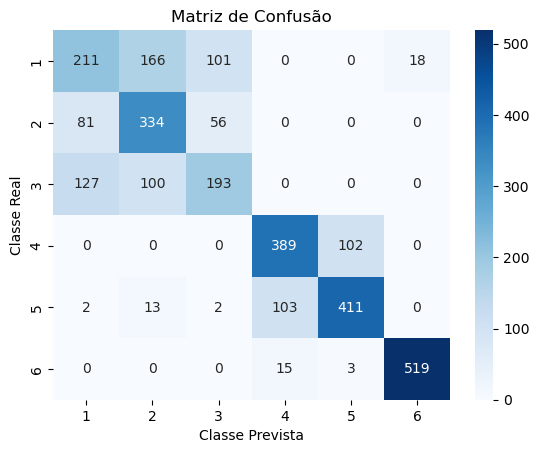

In [64]:
# Guardo as previsões em uma variável
y_previsto = melhor_modelo.predict(X_teste)

# Crio a matriz
cm = confusion_matrix(y_teste, y_previsto)

# Exibo com um heatmap
sns.heatmap(cm, 
            annot=True, 
            cmap="Blues",
            fmt='.0f', #tirar notação cientifica
            xticklabels=np.unique(y_teste),
            yticklabels=np.unique(y_teste))

plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Exibir o mapa de calor
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Faça uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

**Criação de uma variável binária para a classe de maior erro (classe 1)**

Basicamente, será criada uma nova Series com a variável resposta, no entanto, ao invés de conter todas as opções de resposta, onde for 1 continua sendo 1, e em todos os outros casos vira 0.

In [79]:
y_treino_binario = y_treino.applymap(lambda x: 1 if x==1 else 0)

y_treino_binario.value_counts()

5
0    6125
1    1226
dtype: int64

**Criação de um novo modelo para descobrir as melhores variáveis para prever a classe 1**

In [83]:
modelo = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20).fit(x_treino, y_treino_binario)

importancias = modelo.feature_importances_

importancias

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02811984, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00088288, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.11389841, 0.01617778, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [84]:
# Crio um dataframe pra saber qual variável corresponde a cada valor
importancias_variaveis = pd.DataFrame({
    'nome_coluna': x_treino.columns,
    'importance': importancias
})

# Pego o nome das 3 colunas mais significativas para o modelo
colunas_significativas = importancias_variaveis.sort_values(by = 'importance').tail(3)['nome_coluna']

colunas_significativas

65     tGravityAcc-arCoeff()-X,1
166        tBodyGyroJerk-mad()-X
503            fBodyAccMag-std()
Name: nome_coluna, dtype: object

**Treino novamente o modelo do passo 2, adicionando essas 3 variáveis**

In [88]:
# Colunas que serão utilizadas
colunas = ['angle(Y,gravityMean)', 'fBodyAccJerk-bandsEnergy()-1,16', 'tGravityAcc-min()-X', 'tGravityAcc-arCoeff()-X,1', 'tBodyGyroJerk-mad()-X', 'fBodyAccMag-std()']

# Dataframe reduzido
X_treino = x_treino[colunas]
X_teste  = x_teste[colunas]

# ccp_alpha descoberto no item 4
melhor_ccp = 0.009191012966938972


# Criação do modelo
modelo = DecisionTreeClassifier(ccp_alpha=melhor_ccp).fit(X_treino, y_treino)

**Avaliação das acurácias**

Foi possível obter uma melhora de quase 10% na acurácia na base de testes!

In [89]:
print(f'Acurácia treino = {modelo.score(X_treino, y_treino)}')
print(f'Acurácia teste  = {modelo.score(X_teste, y_teste)}')

Acurácia treino = 0.8536253570942729
Acurácia teste  = 0.7861507128309573


**Visualização da matriz de confusão**

Reduzimos drásticamente o número de erros nas previsões da classe = 1

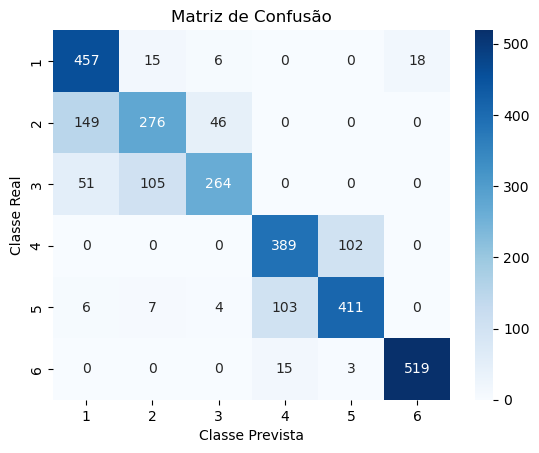

In [90]:
# Guardo as previsões em uma variável
y_previsto = modelo.predict(X_teste)

# Crio a matriz
cm = confusion_matrix(y_teste, y_previsto)

# Exibo com um heatmap
sns.heatmap(cm, 
            annot=True, 
            cmap="Blues",
            fmt='.0f', #tirar notação cientifica
            xticklabels=np.unique(y_teste),
            yticklabels=np.unique(y_teste))

plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Exibir o mapa de calor
plt.show()